In [12]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load data
df = pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#Scaling selected feautures

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['SepalLength_scaled'] = scaler.fit_transform(df['SepalLengthCm'].values.reshape(-1,1))
df['PetalWidthCm_scaled'] = scaler.fit_transform(df['PetalWidthCm'].values.reshape(-1,1))

# Select useful features
X = df[['SepalLength_scaled','PetalWidthCm']].values.reshape(-1,2)  

In [24]:
#Select two linkage methods and two distance metrics and print
#dendrograms for the different combinations of these. You should have 4
#dendrograms.

print('Data size')
print(X.shape)

# Select K
K = 5

Data size
(150, 2)


### Clustering 

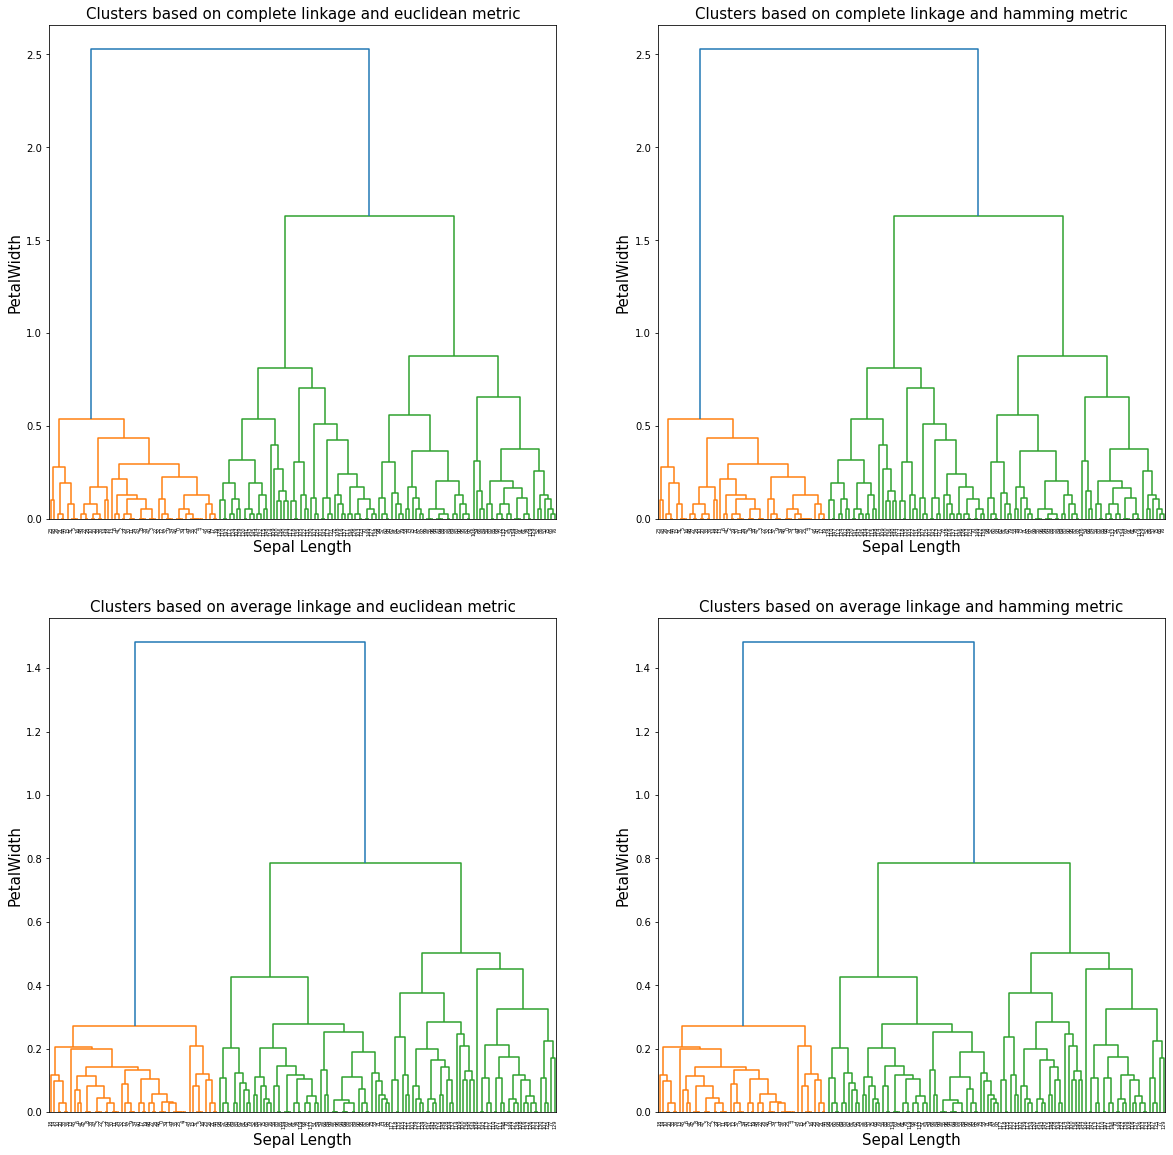

In [46]:
plt.figure(figsize=[20,20])

linkage_types = ['complete', 'average']
adinity_types = ['euclidean','hamming']
count = 1
for i, l in enumerate(linkage_types):
    
    for j,k in enumerate(adinity_types):
        plt.subplot(2, 2, count) 
        cluster = AgglomerativeClustering(n_clusters=K, affinity= k, linkage=l)
        cluster.fit_predict(X)
        #x = plt.scatter(X[:,0], X[:,1], c=cluster.labels_)  
        ax = dendrogram(linkage(X, method=l)) 
        plt.title('Clusters based on {} linkage and {} metric'.format(l,k), fontsize=15)
        plt.xlabel('Sepal Length', fontsize=15)
        plt.ylabel('PetalWidth', fontsize=15)
        count+=1
  



Complete linkage is chosen as it has the best distribution

Longest distance betwwen samples is when number of clusters is 2

In [53]:
#Choose complete linkage euclidean metric
from sklearn.metrics import accuracy_score,silhouette_score
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

print('silhouette={}'.format(score))


silhouette=0.68


The silhouette score is very high. I am not confident in the cluster solution as there are three types of species and the solution only has two clusters.